Here are the solutions to your exercises:

1. **Main motivations for reducing a dataset’s dimensionality:**
   - **Simplify the dataset**: Reducing dimensions helps in simplifying the dataset, making it easier to analyze and visualize.
   - **Reduce computational cost**: With fewer features, training models becomes faster and less resource-intensive.
   - **Reduce storage space**: Lower-dimensional data takes up less storage.
   - **Mitigate the curse of dimensionality**: Helps in improving the performance of machine learning models by removing redundant or noisy features.

   **Main drawbacks:**
   - **Loss of information**: Dimensionality reduction can lead to the loss of important information, which may affect model performance.
   - **Complexity in interpretation**: The reduced dimensions may not be as interpretable as the original features.
   - **Possible introduction of bias**: The process might introduce bias if important variables are unintentionally removed.

2. **The curse of dimensionality** refers to the phenomenon where the performance of machine learning models degrades when the number of features increases, especially in cases where the data points become sparse in high-dimensional spaces. This sparsity makes it difficult to find meaningful patterns, and the model may struggle to generalize well.

3. **Reversibility of dimensionality reduction:**
   - In general, dimensionality reduction is not fully reversible because it involves compressing the data, often leading to a loss of information.
   - Some algorithms (like PCA) allow for approximate reconstruction of the original dataset, but the reconstruction will have some error due to the loss of information.
   - The reconstruction quality depends on how much of the original variance is captured by the reduced dimensions.

4. **PCA on a highly nonlinear dataset:**
   - PCA is a linear algorithm, so it can struggle with highly nonlinear datasets. In such cases, it may not capture the complex relationships between features effectively.
   - However, you can use **Kernel PCA**, which extends PCA to capture nonlinear relationships using kernel methods.

5. **PCA with an explained variance ratio of 95%:**
   - The exact number of dimensions would depend on the dataset's structure. PCA selects the minimum number of components that explain at least 95% of the variance. The reduced dataset might have fewer than the original 1,000 dimensions, but the exact number would vary based on how the data is distributed.

6. **When to use different types of PCA:**
   - **Vanilla PCA**: Use when the dataset fits in memory and you need a standard dimensionality reduction approach.
   - **Incremental PCA**: Use when the dataset is too large to fit in memory, as it processes the data in smaller batches.
   - **Randomized PCA**: Use when you need a faster approximation of PCA for large datasets. It is faster but may be less accurate.
   - **Kernel PCA**: Use when dealing with nonlinear datasets, as it can capture complex structures better than standard PCA.

7. **Evaluating dimensionality reduction algorithms:**
   - **Reconstruction error**: Measure how well the reduced data can be used to reconstruct the original dataset.
   - **Variance explained**: Check the proportion of variance captured by the reduced dimensions (e.g., in PCA).
   - **Model performance**: Compare how well a model trained on reduced dimensions performs compared to the original dataset.
   - **Visualization**: If reducing to 2D or 3D, visualizing the data can help check how well the algorithm preserves the structure.

8. **Chaining two different dimensionality reduction algorithms:**
   - Yes, it can make sense in some cases. For example, you can use PCA to reduce dimensions initially and then apply t-SNE for visualization. PCA can help remove noise and speed up the t-SNE process.

9. **Random Forest classifier on the MNIST dataset:**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import time

In [2]:
# Load the MNIST dataset and split it into training and test sets(take the first 60000 samples for training and the remaining 10000 for testing)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [3]:
# Convert target to integer
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

In [4]:
# Train a random forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set
start = time.time()
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)
train_time_original = time.time() - start

In [5]:
# Evaluate on the test set
y_pred = rnd_clf.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)
print(f"Original Random Forest Training Time: {train_time_original:.2f} seconds")
print(f"Original Random Forest Accuracy: {accuracy_original * 100:.2f}%")


Original Random Forest Training Time: 65.70 seconds
Original Random Forest Accuracy: 96.74%


In [6]:
# Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%
pca = PCA(n_components=0.95, random_state=42)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [7]:
# Train a new random forest classifier on the reduced dataset and time how long it takes, then evaluate the resulting model on the test set
start = time.time()
rnd_clf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf_reduced.fit(X_train_reduced, y_train)
train_time_reduced = time.time() - start

In [8]:
# Evaluate on the test set
y_pred_reduced = rnd_clf_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Reduced Random Forest Training Time: {train_time_reduced:.2f} seconds")
print(f"Reduced Random Forest Accuracy: {accuracy_reduced * 100:.2f}%")

Reduced Random Forest Training Time: 189.40 seconds
Reduced Random Forest Accuracy: 94.87%


10. **Using t-SNE for MNIST visualization:**


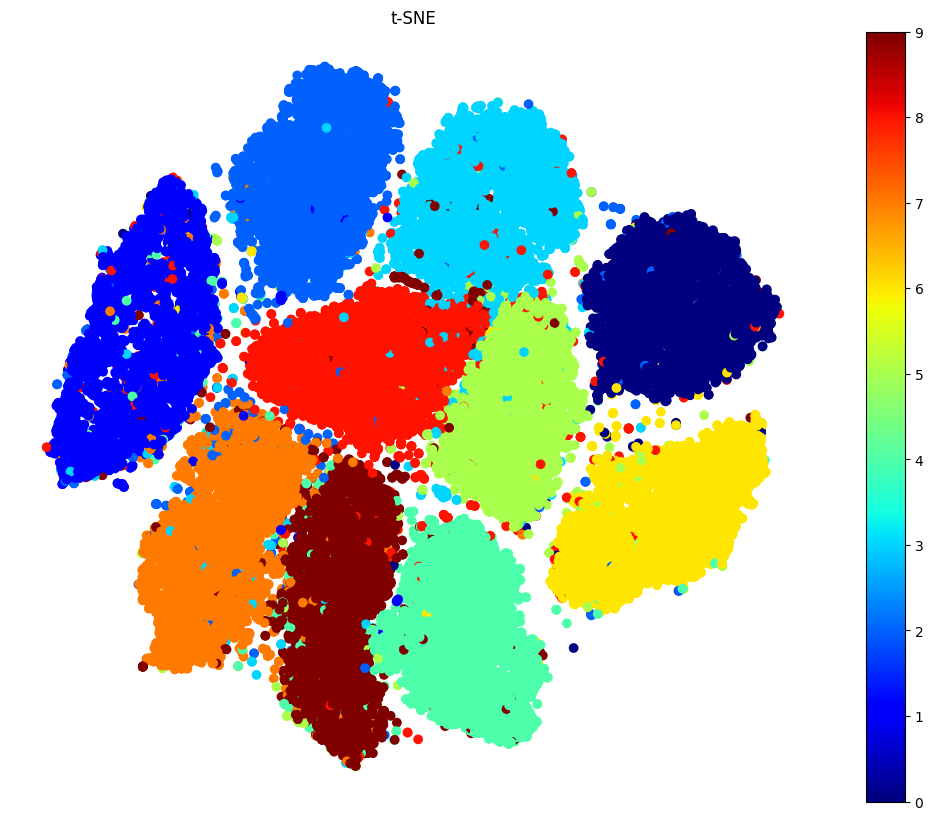

In [9]:
# Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding

# Use t-SNE to reduce the MNIST dataset down to two dimensions
tsne = TSNE(n_components=2, random_state=42)
X_train_reduced_tsne = tsne.fit_transform(X_train)

# Plot the result using Matplotlib
plt.figure(figsize=(13,10))
plt.scatter(X_train_reduced_tsne[:, 0], X_train_reduced_tsne[:, 1], c=y_train, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.title("t-SNE")
plt.show()


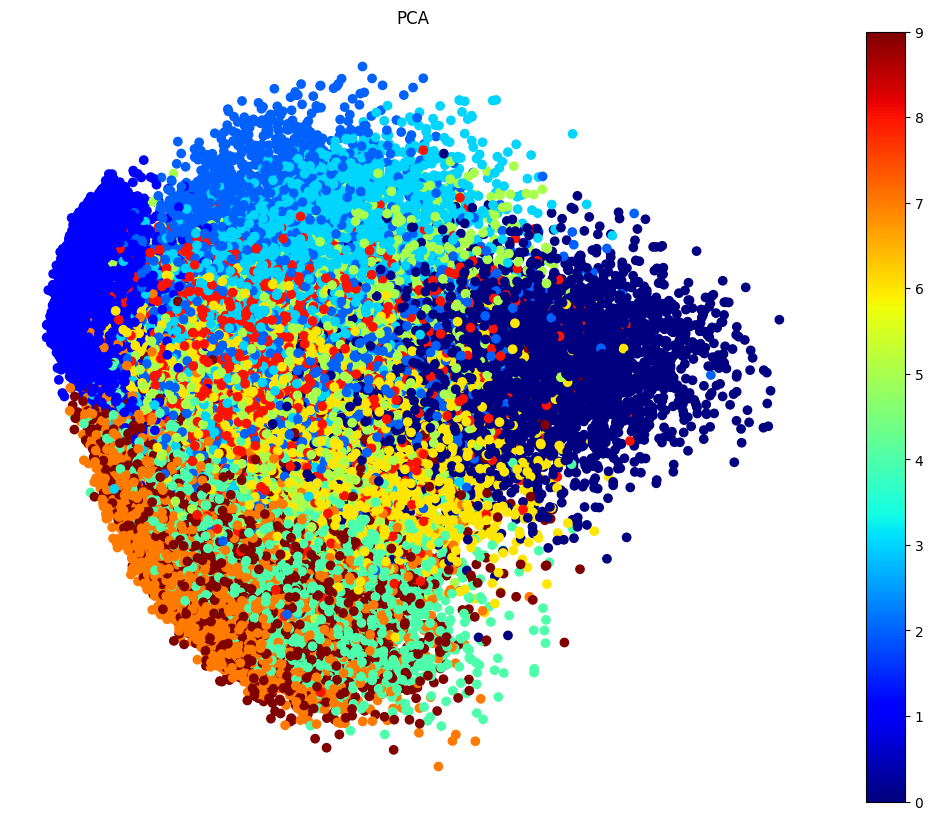

In [10]:
# Use PCA to reduce the MNIST dataset down to two dimensions
pca = PCA(n_components=2, random_state=42)
X_train_reduced_pca = pca.fit_transform(X_train)

# Plot the result using Matplotlib
plt.figure(figsize=(13,10))
plt.scatter(X_train_reduced_pca[:, 0], X_train_reduced_pca[:, 1], c=y_train, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.title("PCA")
plt.show()

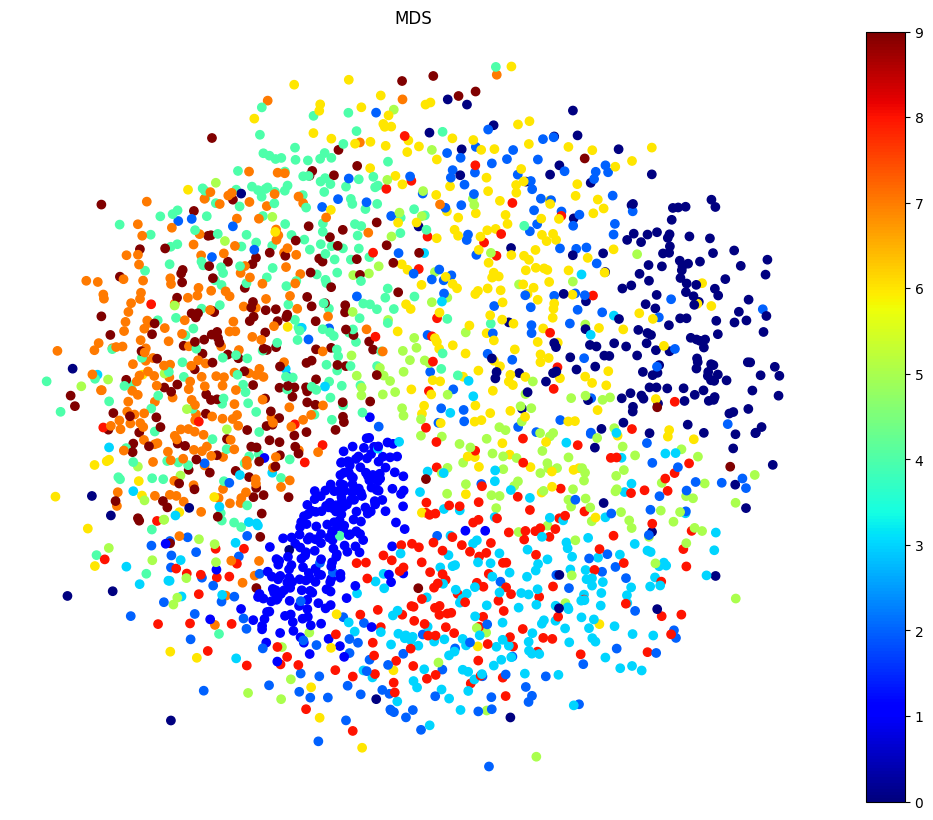

In [16]:
# Use MDS to reduce the MNIST dataset down to two dimensions
m = 2000
mds = MDS(n_components=2, random_state=42)
X_train_reduced_mds = mds.fit_transform(X_train[:m])

# Plot the result using Matplotlib
plt.figure(figsize=(13,10))
plt.scatter(X_train_reduced_mds[:, 0], X_train_reduced_mds[:, 1], c=y_train[:m], cmap="jet")
plt.axis('off')
plt.colorbar()
plt.title("MDS")
plt.show()


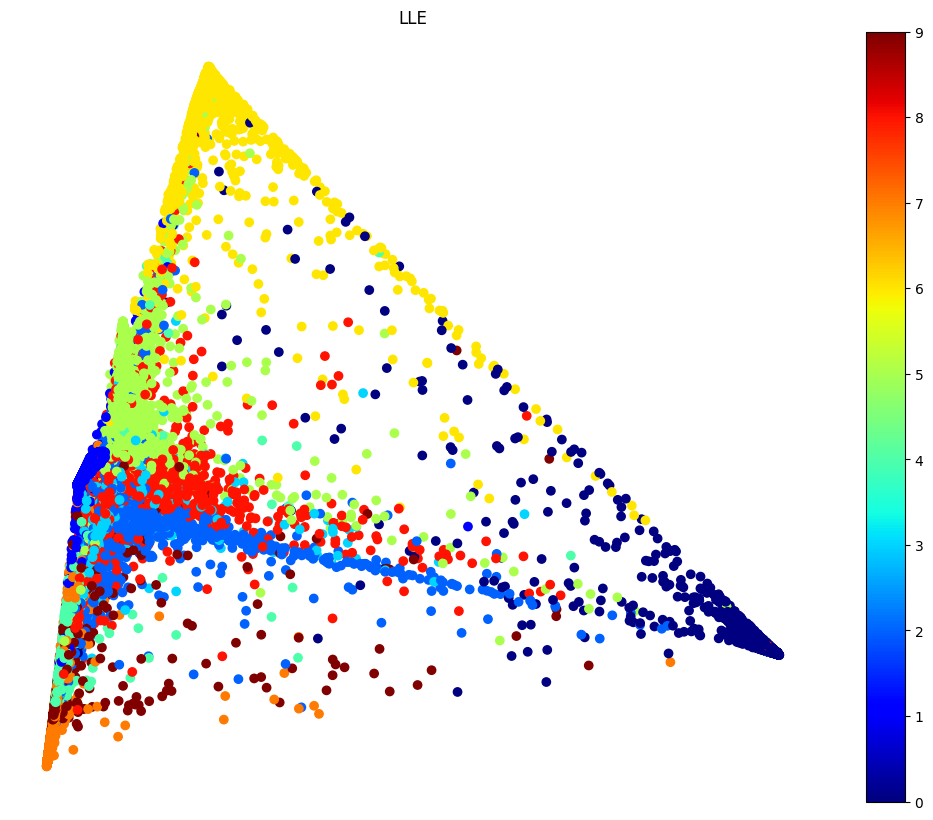

In [12]:
# Use LLE to reduce the MNIST dataset down to two dimensions
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_train_reduced_lle = lle.fit_transform(X_train)

# Plot the result using Matplotlib
plt.figure(figsize=(13,10))
plt.scatter(X_train_reduced_lle[:, 0], X_train_reduced_lle[:, 1], c=y_train, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.title("LLE")
plt.show()